# Investment Valuations

In this activity, you’ll use the Alpaca API to get the pricing information for two stocks.

Instructions:

1. Create your environment file (`.env`) in your project folder. Make sure that this file holds your Alpaca API and secret keys.

2. Import the Alpaca API and secret keys into the `investment_valuations.ipynb` notebook.

3. Create the Alpaca API `REST` object by calling the Alpaca `tradeapi.REST` function and then setting the `alpaca_api_key`, `alpaca_secret_key`, and `api_version`.

4. Review the two-stock `portfolio_df` DataFrame that we created for you in the starter notebook. Run this cell as you work through the remaining steps in this activity.

5. Get the closing prices of the prior business day for the two stocks in question, Apple and Microsoft, by using the Alpaca `get_barset` function. Note that this requires values for `tickers`, `timeframe`, and the `start` and `end` dates. Add the `df` property to the end of this API call to automatically convert the response to a DataFrame.

> **Note** The solution notebook uses `"2020-06-30"` for both the `start` and the `end` date.

6. Get the closing prices for both stocks. Convert the values to floating point numbers so that you can use them in a future calculation.

> **Hint** A floating point number is a numerical value that has decimal places. To convert a number to a `float`, call the [float function](https://docs.python.org/3/library/functions.html#float) and pass the closing price as a parameter.

7. Calculate the current value, in dollars, of the portfolio. To do so, multiply the closing price of each stock by the shares that the `portfolio_df` DataFrame supplies for you. Print the current value of each stock, and then add the values to get the total value of the portfolio.

8. Create a Pandas DataFrame named `portfolio_value_df` that includes the current value, in dollars, of each stock. Plot a bar chart that visualizes the DataFrame based on the calculated values of each stock.

9. Review the code in the cell provided in the starter notebook to learn how a pie chart is created using the current valuations of Apple and Microsoft. Run the cell so that you can visualize the information.

> **Challenge Connection** An terrific way to visualize the value of each stock in a portfolio is by using a [Pandas pie chart](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html) You’ll need to create a pie chart in this week’s Challenge.


References:

[Alpaca API Docs](https://alpaca.markets/docs/api-documentation/)

[Pandas pie plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)


## Import the required libraries and dependencies

In [95]:
# Import the required libraries and dependencies
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import TimeFrame
import seaborn as sns
%matplotlib inline

## Step 1: Create your environment file (`.env`) in your project folder. Make sure that this file holds your Alpaca API and secret keys.

## Step 2: Import the Alpaca API and secret keys into the `investment_valuations.ipynb` notebook.

* Load the environment variable by calling the `load_dotenv()` function.
* Set the value of the variables `alpaca_api_key` and `alpaca_secret_key` equal to their respective environment variables. 
* Confirm the variables are available by checking the `type` of each. 


In [42]:
# Load the environment variables by calling the load_dotenv function
# YOUR CODE HERE
load_dotenv()

True

In [43]:
# Set Alpaca API key and secret by calling the os.getenv function and referencing the environment variable names
# Set each environment variable to a notebook variable of the same name
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key))
    

str

str

## Step 3: Create the Alpaca API `REST` object by calling the Alpaca `tradeapi.REST` function and then setting the `alpaca_api_key`, `alpaca_secret_key`, and `api_version`.

In [122]:
# Create your Alpaca API REST object by calling Alpaca's tradeapi.REST function
# Set the parameters to your alpaca_api_key, alpaca_secret_key and api_version="v2"
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


## Step 4: Review the two-stock `portfolio_df` DataFrame that we created for you in the starter notebook. Run this cell as you work through the remaining steps in this activity.

In [45]:
# Set current amount of shares data
shares_data = {
    "shares": [200, 320]
}

# Set the tickers
tickers = ["MSFT", "AAPL"]

# Create the shares DataFrame
portfolio_df = pd.DataFrame(shares_data, index=tickers)

# Display shares data
portfolio_df

,shares
MSFT,200
AAPL,320


## Step 5: Get the closing prices of the prior business day for the two stocks in question, Apple and Microsoft, by using the Alpaca `get_barset` function. Note that this requires values for `tickers`, `timeframe`, and the `start` and `end` dates. Add the `df` property to the end of this API call to automatically convert the response to a DataFrame.

* Confirm the value for `tickers` from a the prior step
* Set the values for `start_date` and `end_date` using the `pd.Timestamp` function.
* Set the `timeframe` value to 1 day.
* Create the `portfolio_prices_df` DataFrame by setting it equal to the `alpaca.get_barset` function. 


In [46]:
# Confirm the values of the  `tickers` variable created in the prior step
# YOUR CODE HERE

tickers


['MSFT', 'AAPL']

In [47]:
# Set the values for start_date and end_date using the pd.Timestamp function
# Inside the function set the date parameter to the prior business day 
# Both the start_date and end_date should contain the same date valuloe, as we looking for the closing price
# of the prior business day. 
# Set the parameter tz to "America/New_York", 
# Set this all to the ISO format by calling the isoformat function


start_date = pd.Timestamp("2020-06-30", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-30", tz="America/New_York").isoformat()


In [48]:
# Set timeframe to one day (1D) for the Alpaca API
timeframe = "1D"

In [50]:
# Use the Alpaca get_barset function to gather the price information for each ticker
# Include the function parameters: tickers, timeframe, start, and end
# Be sure to call the df property to ensure that the returned information is set as a DataFrame
portfolio_prices_df = alpaca.get_bars(
    tickers,
    TimeFrame.Day,
    start = start_date,
    end = end_date
).df

# Review the resulting `portfolio_prices_df` DataFrame. 
portfolio_prices_df.tail()
 


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-02-14 05:00:00+00:00,293.59,296.76,291.350,295.00,35112075,511142,294.411691,MSFT
2022-02-15 05:00:00+00:00,300.00,300.80,297.020,300.47,26669572,387237,299.567610,MSFT
2022-02-16 05:00:00+00:00,298.18,300.87,293.680,299.50,29267918,401279,297.471149,MSFT
2022-02-17 05:00:00+00:00,295.93,296.80,290.000,290.73,31724480,489884,292.988548,MSFT
2022-02-18 05:00:00+00:00,293.14,293.86,286.305,287.93,33329232,531190,289.145793,MSFT


## Step 6: Get the closing prices for both stocks. Convert the values to floating point numbers so that you can use them in a future calculation.

In [60]:
# Fetch the current closing prices for Apple and Microsoft from the portfolio_prices_df DataFrame 
# Remember that the DataFrame generated from the Alpaca call incorporates multi-indexing 
# Be sure to setz the values from the DataFrame to a float by calling the `float` function 
aapl_price = portfolio_prices_df.loc[portfolio_prices_df["symbol"] == "AAPL", ("symbol","close")]
msft_price = portfolio_prices_df.loc[portfolio_prices_df["symbol"] == "MSFT", ("symbol","close")]

display(print(aapl_price))

display(print(msft_price))

                          symbol   close
timestamp                               
2022-02-01 05:00:00+00:00   AAPL  174.61
2022-02-02 05:00:00+00:00   AAPL  175.84
2022-02-03 05:00:00+00:00   AAPL  172.90
2022-02-04 05:00:00+00:00   AAPL  172.39
2022-02-07 05:00:00+00:00   AAPL  171.66
2022-02-08 05:00:00+00:00   AAPL  174.83
2022-02-09 05:00:00+00:00   AAPL  176.28
2022-02-10 05:00:00+00:00   AAPL  172.12
2022-02-11 05:00:00+00:00   AAPL  168.64
2022-02-14 05:00:00+00:00   AAPL  168.88
2022-02-15 05:00:00+00:00   AAPL  172.79
2022-02-16 05:00:00+00:00   AAPL  172.55
2022-02-17 05:00:00+00:00   AAPL  168.88
2022-02-18 05:00:00+00:00   AAPL  167.30


None

                          symbol   close
timestamp                               
2022-02-01 05:00:00+00:00   MSFT  308.76
2022-02-02 05:00:00+00:00   MSFT  313.46
2022-02-03 05:00:00+00:00   MSFT  301.25
2022-02-04 05:00:00+00:00   MSFT  305.94
2022-02-07 05:00:00+00:00   MSFT  300.95
2022-02-08 05:00:00+00:00   MSFT  304.56
2022-02-09 05:00:00+00:00   MSFT  311.21
2022-02-10 05:00:00+00:00   MSFT  302.38
2022-02-11 05:00:00+00:00   MSFT  295.04
2022-02-14 05:00:00+00:00   MSFT  295.00
2022-02-15 05:00:00+00:00   MSFT  300.47
2022-02-16 05:00:00+00:00   MSFT  299.50
2022-02-17 05:00:00+00:00   MSFT  290.73
2022-02-18 05:00:00+00:00   MSFT  287.93


None

## Step 7: Calculate the current value, in dollars, of the portfolio. To do so, multiply the closing price of each stock by the shares that the `portfolio_df` DataFrame supplies for you. Print the current value of each stock, and then add the values to get the total value of the portfolio.

1. Multipy the current price of each stock by the shares indicated in the `portfolio_df` DataFrame.
2. Print the current value of each stock.
3. Add the values together and print the current total vaue of the portfolio. 

In [89]:
# Compute the current value in dollars of each of the stock's in the portfolio
# This is done by multiplying the price from the portfolio_prices_df DataFrame 
# and the shares from the portfolio_df DataFrame.
msft_value = msft_price.iloc[-1].loc["close"] * portfolio_df.loc[['MSFT']]['shares']
aapl_value = aapl_price.iloc[-1].loc["close"] * portfolio_df.loc[['AAPL']]['shares']

# Print the current value of each stock in the stocks portfolio

print(f"The current value of MSFT is ${float(msft_value):,.2f}")
print(f"The current value of AAPL is ${float(aapl_value):,.2f}")

port_total_value = float(msft_value) + float(aapl_value)

# Print the total value of the current portfolio. 
print(f"The current value of the portfolio is ${float(port_total_value):,.2f}")


The current value of MSFT is $57,586.00
The current value of AAPL is $53,536.00
The current value of the portfolio is $111,122.00


## Step 8: Create a Pandas DataFrame named `portfolio_value_df` that includes the current value, in dollars, of each stock. Plot a bar chart that visualizes the DataFrame based on the calculated values of each stock.

1. Create a portfolio_value_df DataFrame that reflects the current value of shares.
2. Create a bar chart visualizing the values of the portfolio_value_df DataFrame. 

In [91]:
# Create a Pandas DataFrame that includes the current value of both MSFT and AAPL.
portfolio_value_df =  pd.DataFrame({
    "MSFT": msft_value,
    "AAPL": aapl_value
})

# Display portfolio_value_df DataFrame 
# YOUR CODE HERE
portfolio_value_df

,MSFT,AAPL
AAPL,NaN,53536.0
MSFT,57586.0,NaN


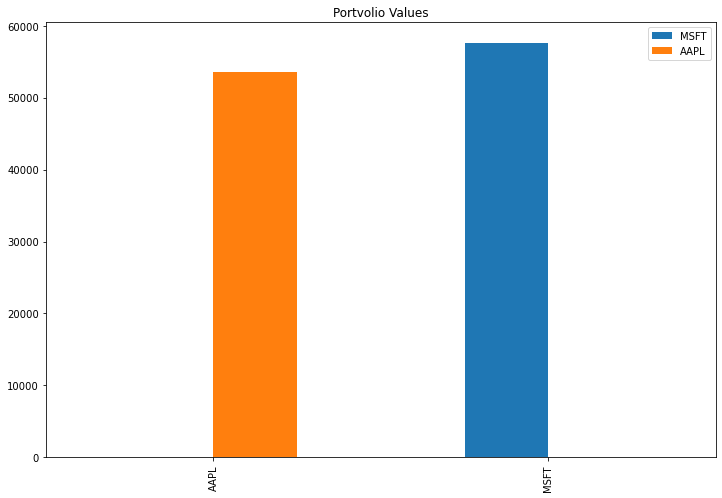

In [119]:
# Create a bar chart to show the value of shares
# Give the plot a title and adjust the figure size
# YOUR CODE HERE



ax = portfolio_value_df.plot(kind='bar', figsize = (12,8), title = "Portvolio Values");



## Step 9: Review the code in the cell provided in the starter notebook to learn how a pie chart is created using the current valuations of Apple and Microsoft. Run the cell so that you can visualize the information.

1. Create the DataFrame to use in the pie chart. 
2. Use Pandas `plot.pie` to visualize the current value of each of the two stocks relative to the total portfolio.

In [120]:
# Using the DataFrame created below:
pie_values_df = pd.DataFrame(
    {'Value':[aapl_value, msft_value]},
    index=['Apple', 'MSFT']
)

pie_values_df

,Value
Apple,"AAPL 53536.0 Name: shares, dtype: float64"
MSFT,"MSFT 57586.0 Name: shares, dtype: float64"


In [121]:
# Create a  pie chart to visualize the proportion each stock is of the portfolio as a whole 
# Give the plot a title
pie_values_df.plot.pie(y='Value', title='Portfolio Composition - 2020-07-14 ')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().